# 🏠 Ev Fiyat Tahmin Projesi - Modelleme ve Değerlendirme

Bu notebook, temel bir LightGBM modeli ile hızlı değerlendirme içerir (sadece sayısal özelliklerle).


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
print("✅ Kütüphaneler yüklendi")


✅ Kütüphaneler yüklendi


In [2]:
# İşlenmiş veri üzerinden modelleme
# Önce 2. notebook'u çalıştırıp processed_data.csv üretildiğinden emin olun

df = pd.read_csv('processed_data.csv')
train_df = df[df['SalePrice'].notnull()].copy()
test_df = df[df['SalePrice'].isnull()].copy()

y = train_df['SalePrice']
X = train_df.drop(columns=['Id','SalePrice'], errors='ignore')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape


((1168, 192), (292, 192))

In [3]:
# Basit LightGBM modeli
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_val)
rmse = (mean_squared_error(y_val, pred))**0.5
print(f"RMSE: {rmse:,.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5874
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Info] Start training from score 181441.541952


RMSE: 29,571.28


> Not: Bu notebook hızlı bir doğrulama sunar. Tam pipeline için veri ön işleme notebook'una bakınız.


## 🔧 Hiperparametre Optimizasyonu (Hızlı Grid)
Daha iyi sonuç için küçük bir grid ile deneme yapılır.


In [4]:
from sklearn.model_selection import GridSearchCV
params = {
    'learning_rate':[0.01, 0.1],
    'n_estimators':[500, 1500],
}
gs = GridSearchCV(LGBMRegressor(random_state=42), params, cv=3,
                  scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X_train, y_train)
print('Best params:', gs.best_params_)
print('CV RMSE:', (-gs.best_score_)**0.5)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5353
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 139
[LightGBM] [Info] Start training from score 181925.491656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5363
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 138
[LightGBM] [Info] Start training from score 179459.343188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5373
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 136
[LightGBM] [Info] Start training from score 182937.246470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5363
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 138
[LightGBM] [Info] Start training from score 179459.343188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5373
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 136
[LightGBM] [Info] Start training from score 182937.246470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5353
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 139
[LightGBM] [Info] Start training from score 181925.491656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5874
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Info] Start training from score 181441.541952


Best params: {'learning_rate': 0.01, 'n_estimators': 1500}
CV RMSE: 27831.78030917186


## 📈 Feature Importance
En önemli değişkenleri görselleştirelim.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5874
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Info] Start training from score 181441.541952


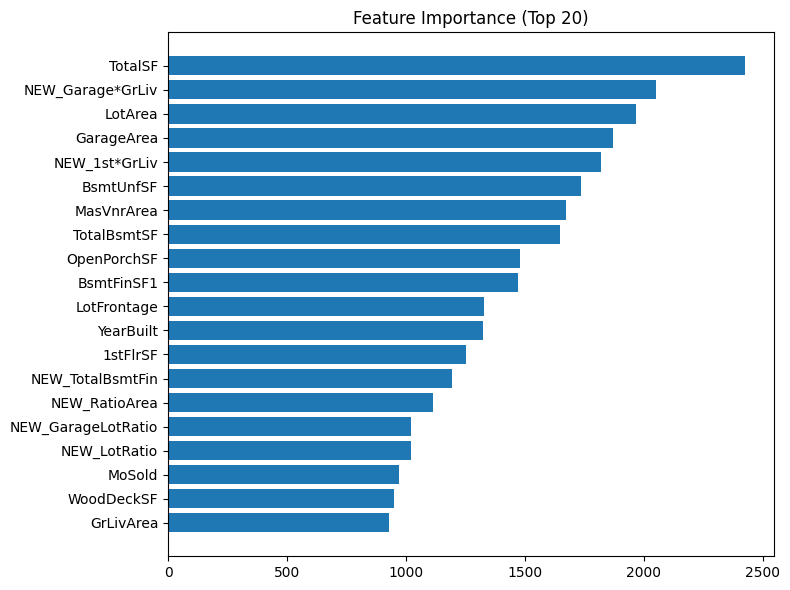

In [5]:
import matplotlib.pyplot as plt
import numpy as np
best_model = gs.best_estimator_
best_model.fit(X_train, y_train)
imp = best_model.feature_importances_
idx = np.argsort(imp)[-20:]
plt.figure(figsize=(8,6))
plt.barh(range(len(idx)), imp[idx])
plt.yticks(range(len(idx)), X_train.columns[idx])
plt.title('Feature Importance (Top 20)')
plt.tight_layout()
plt.show()


## 🔁 Çoklu Model Karşılaştırma (CV RMSE)
Script'teki model listesini kullanarak 5-katlı CV ile RMSE karşılaştırması.


In [6]:
models = [
    ('LR', LinearRegression()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror')),
    ('LightGBM', LGBMRegressor()),
]
for name, reg in models:
    rmse = np.mean(np.sqrt(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')))
    print(f"RMSE: {rmse:.4f} ({name})")


RMSE: 35181.0870 (LR)
RMSE: 47608.1835 (KNN)


RMSE: 41148.2794 (CART)


RMSE: 28843.9978 (RF)


RMSE: 26120.4950 (GBM)


RMSE: 28229.3697 (XGBoost)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5868
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 157
[LightGBM] [Info] Start training from score 180717.091610


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5874
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Info] Start training from score 180407.575342


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5862
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 156
[LightGBM] [Info] Start training from score 180007.375000


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5893
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 154
[LightGBM] [Info] Start training from score 182883.660103


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5871
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score 180590.277397


RMSE: 28485.8933 (LightGBM)


## log1p Dönüşümü ile Modelleme
Log dönüşümü sonrası RMSE'yi inverse alarak hesaplayalım.


In [7]:
y_log = np.log1p(train_df['SalePrice'])
X_full = train_df.drop(columns=['Id','SalePrice'], errors='ignore')
X_train, X_val, y_train, y_val = train_test_split(X_full, y_log, test_size=0.2, random_state=42)
log_model = LGBMRegressor(random_state=42).fit(X_train, y_train)
y_pred = log_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
print(f'Log-transform RMSE: {rmse:,.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5874
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Info] Start training from score 12.030658


Log-transform RMSE: 30,366.00


## 📤 Kaggle Submission
Test seti için tahmin üretip `housePricePredictions.csv` olarak kaydedelim.


In [8]:
final_model = LGBMRegressor(random_state=42)
final_model.fit(X_full, y_log)
X_test_final = test_df.drop(columns=['Id','SalePrice'], errors='ignore')
preds_log = final_model.predict(X_test_final)
preds = np.expm1(preds_log)

# Id'leri doğrudan orijinal test dosyasından al (sıra hizalıdır)
_test = pd.read_csv('datasets/housePrice/house_price_test.csv')
test_ids = _test['Id'].values
assert len(test_ids) == len(preds), f"Id/pred len mismatch: {len(test_ids)} vs {len(preds)}"

submission = pd.DataFrame({'Id': test_ids, 'SalePrice': preds})
submission.to_csv('housePricePredictions.csv', index=False)
print('housePricePredictions.csv kaydedildi')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6159
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 164
[LightGBM] [Info] Start training from score 12.024057


housePricePredictions.csv kaydedildi
